C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35428\2280589642.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],


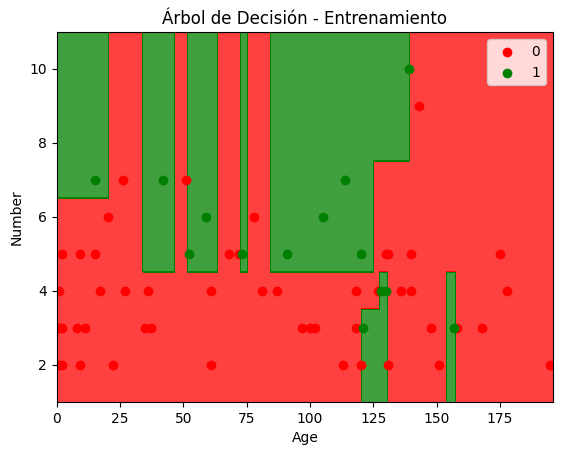

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35428\2280589642.py:58: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],


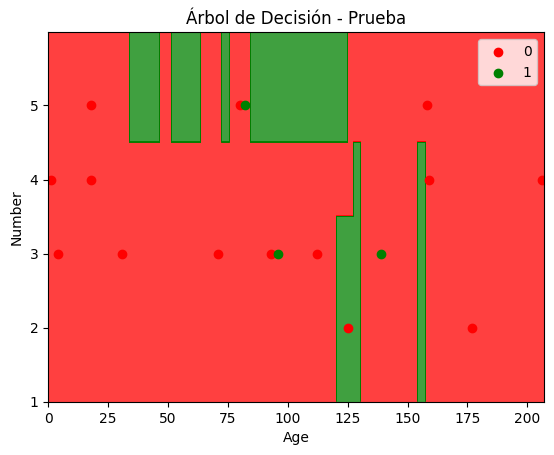

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35428\2280589642.py:75: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],


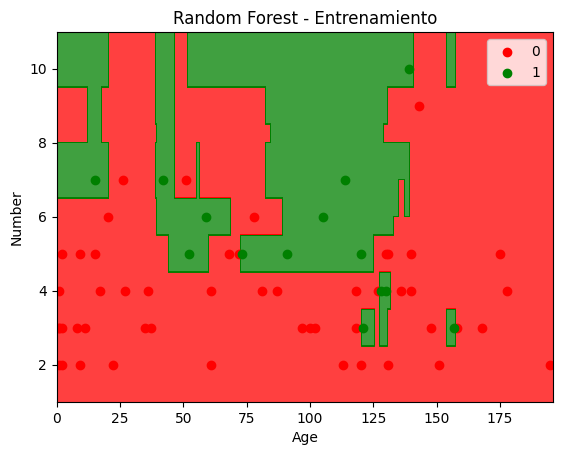

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35428\2280589642.py:92: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],


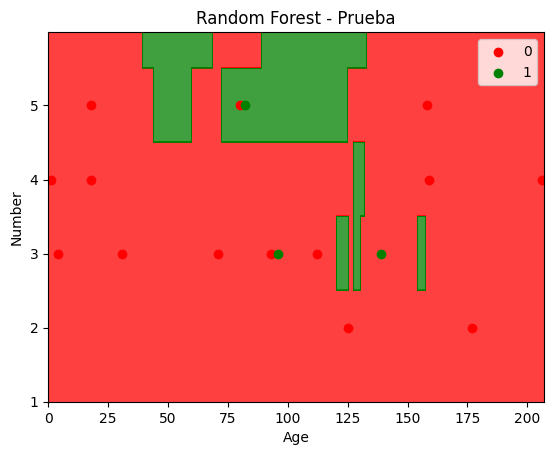

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from matplotlib.colors import ListedColormap

# Cargar el dataset desde el enlace proporcionado
url = "https://github.com/madhurragarwal/Decision-tree-and-Random-Forest---Kyphosis-dataset/blob/main/kyphosis.csv?raw=true"
dataset = pd.read_csv(url)

# Transformar la variable categórica 'Kyphosis' en numérica
dataset['Kyphosis'] = dataset['Kyphosis'].map({'absent': 0, 'present': 1})

# Separar variables predictoras y objetivo (seleccionamos solo dos características para visualización)
X = dataset[['Age', 'Number']]  # Selección de las dos primeras columnas para la visualización
y = dataset['Kyphosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Visualizar el algoritmo de entrenamiento gráficamente con los resultados para Árbol de Decisión
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("Árbol de Decisión - Entrenamiento")
plt.xlabel("Age")
plt.ylabel("Number")
plt.legend()
plt.show()

# Visualizar el algoritmo de prueba gráficamente con los resultados para Árbol de Decisión
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("Árbol de Decisión - Prueba")
plt.xlabel("Age")
plt.ylabel("Number")
plt.legend()
plt.show()

# Visualizar el algoritmo de entrenamiento gráficamente con los resultados para Random Forest
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("Random Forest - Entrenamiento")
plt.xlabel("Age")
plt.ylabel("Number")
plt.legend()
plt.show()

# Visualizar el algoritmo de prueba gráficamente con los resultados para Random Forest
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j].iloc[:, 0], X_set[y_set == j].iloc[:, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title("Random Forest - Prueba")
plt.xlabel("Age")
plt.ylabel("Number")
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import confusion_matrix

# Predecir resultados para el conjunto de prueba con el Árbol de Decisión
y_pred_dt = dt_model.predict(X_test)

# Predecir resultados para el conjunto de prueba con el Random Forest
y_pred_rf = rf_model.predict(X_test)

# Generar las matrices de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir la matriz de confusión para el Árbol de Decisión
print("Matriz de Confusión - Árbol de Decisión:")
print(cm_dt)

# Imprimir la matriz de confusión para el Random Forest
print("\nMatriz de Confusión - Random Forest:")
print(cm_rf)


Matriz de Confusión - Árbol de Decisión:
[[13  1]
 [ 3  0]]

Matriz de Confusión - Random Forest:
[[13  1]
 [ 2  1]]
